# 과제 1 코드

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

flight_data = pd.read_excel("데이터 시각화 과제 데이터.xlsx", sheet_name="1.항공사선택(문제)", skiprows=12)[['항공사', '예정이륙', '실제이륙']]
flight_data = flight_data.rename(columns={'항공사': 'airline', '예정이륙': 'scheduled', '실제이륙': 'actual'})
flight_data['delay'] = (flight_data['actual'] - flight_data['scheduled']).dt.total_seconds() / 60

flight_data.groupby('airline').agg({'delay': ['mean', 'std']})

plt.rcParams['font.family'] = 'Gulim'

sorted_airlines = sorted(flight_data['airline'].unique())

sns.boxplot(data=flight_data, y='airline', x='delay', palette='Set3', width=0.5, orient='h', order=sorted_airlines)
sns.stripplot(data=flight_data, y='airline', x='delay', color='grey', alpha=0.5, size=4, jitter=True, order=sorted_airlines)

plt.axvline(x=0, color='blue')

plt.title('항공사별 지연시간 분포')
plt.xlabel('')
plt.ylabel('지연시간 (분)')

plt.show()


delay           
          mean        std
airline                  
A항공사     68.98  37.670153
B항공사     11.30  25.707340
C항공사     46.46  17.351363
D항공사      8.18  14.458512
E항공사      8.18  14.323792

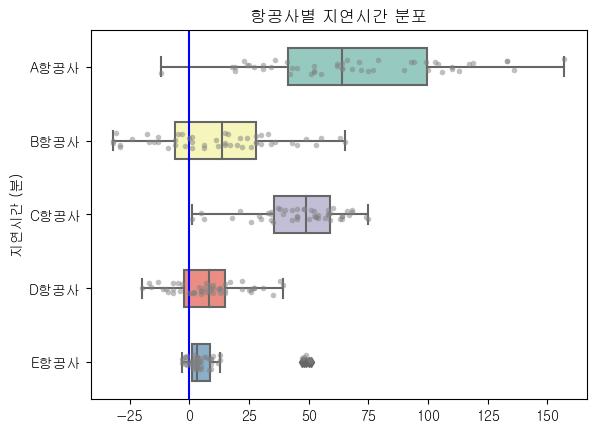